In [188]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
#load the dataset
data=pd.read_csv("C:\\Users\\dheni\\Downloads\\DS Assignments\\14.Random Forest\\glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [192]:
#summary of dataset
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [194]:
#explore the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [196]:
#missing values
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [198]:
#import library
from scipy import stats

In [200]:
#using z-score to detect outliers
z_scores=np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers=np.where(z_scores<3)

In [202]:
#handling outliers
data=data[(z_scores<3).all(axis=1)]
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


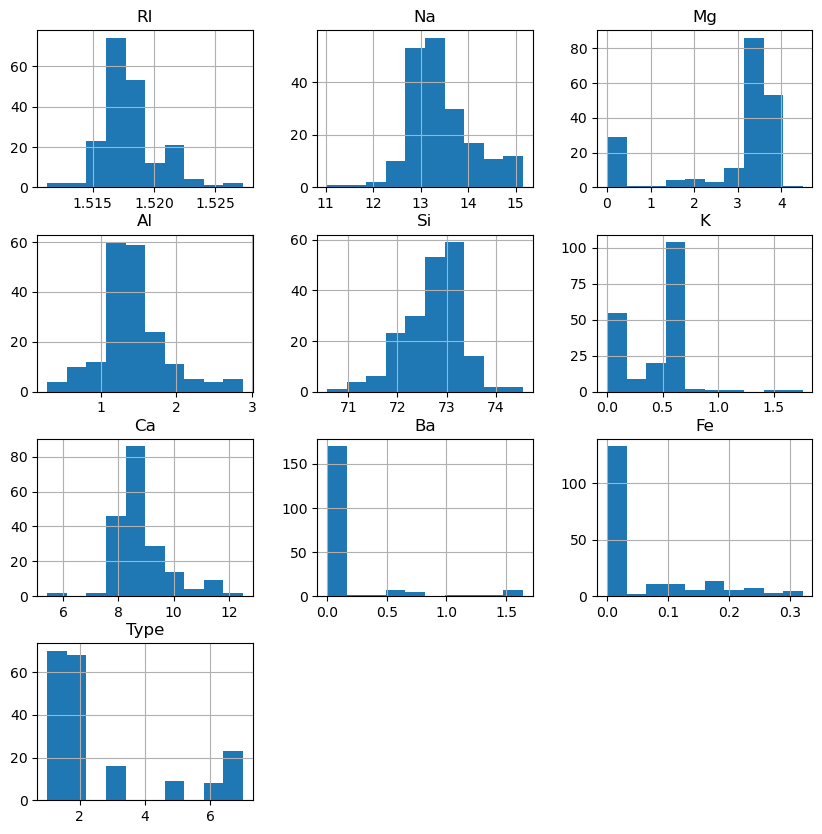

In [204]:
#histograms
data.hist(figsize=(10, 10))
plt.show()

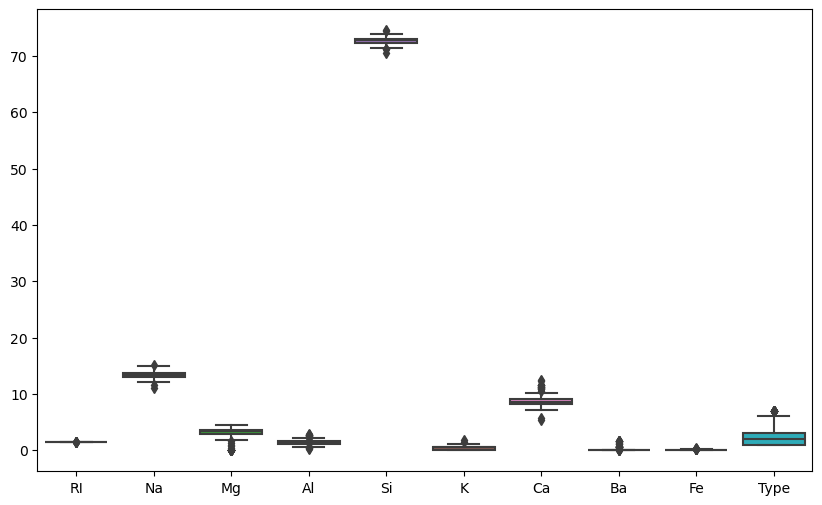

In [206]:
#box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data)
plt.show()

In [208]:
#import library
from sklearn.preprocessing import StandardScaler

In [210]:
#scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Type', axis=1))
scaled_features

array([[ 1.29178128,  0.33212692,  1.23339705, ..., -0.07565285,
        -0.34629211, -0.60305615],
       [-0.19783224,  0.70439768,  0.55158129, ..., -1.00814732,
        -0.34629211, -0.60305615],
       [-0.82434616,  0.16832779,  0.51327703, ..., -1.05882637,
        -0.34629211, -0.60305615],
       ...,
       [-0.53080467,  2.23815319, -2.20632516, ..., -0.43040618,
         4.11744651, -0.60305615],
       [ 1.13405749,  1.4042667 , -2.20632516, ..., -0.38986294,
         4.25781564, -0.60305615],
       [-0.67976602,  1.43404836, -2.20632516, ..., -0.3493197 ,
         4.06129885, -0.60305615]])

In [214]:
#convert back to dataframe
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['Type'] = data['Type']
scaled_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,-0.603056,1.0
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,-0.603056,1.0
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,-0.603056,1.0
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,-0.603056,1.0
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,-0.603056,1.0
...,...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,-0.603056,NaN
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,-0.603056,7.0
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,-0.603056,7.0
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,-0.603056,7.0


In [216]:
#import library
from sklearn.model_selection import train_test_split

In [218]:
#split the dataset
x = scaled_data.drop('Type', axis=1)
y = scaled_data['Type']

In [220]:
#fill any null values
scaled_data['Type'].fillna('0',inplace=True)

In [222]:
#ensure target variable doesn't contain nan after handling
if y.isnull().any():
    print("Target variable 'y' still contains NaN values.")
else:
    print("Target variable 'y' is clean.")

Target variable 'y' is clean.


In [226]:
#convert 'y' to a categorical type
y = y.astype(int)
y

0      1
1      1
2      1
3      1
4      1
      ..
189    0
190    7
191    7
192    7
193    7
Name: Type, Length: 194, dtype: int32

In [228]:
#train_test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [230]:
#feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[ 1.74937821,  1.14878702,  0.71209022, ...,  0.76123268,
        -0.37730124, -0.58738348],
       [-0.25717426, -0.84603186,  0.47694041, ..., -0.27149382,
        -0.37730124, -0.58738348],
       [ 2.18858068,  0.02761144,  0.35936551, ...,  0.01199973,
        -0.37730124, -0.58738348],
       ...,
       [-0.9418134 , -0.43833165,  0.41080453, ..., -0.43349013,
        -0.37730124,  1.73409359],
       [-1.12696739,  1.04686196, -2.09501057, ...,  0.2549942 ,
         1.2528539 ,  0.02353154],
       [ 0.05715692, -1.16636774, -0.06684351, ...,  0.60936113,
        -0.37730124,  1.85627659]])

In [232]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[-0.16244431,  0.3333866 ,  0.59451532, -0.66336789,  0.05511171,
        -1.14851783, -0.22086997, -0.37730124, -0.58738348],
       [-0.09785571, -1.07900341,  0.60186375, -0.55644971,  0.62484767,
         0.64812072, -0.11962228, -0.37730124, -0.58738348],
       [ 1.56853013, -2.70980425, -0.71350547,  0.2988957 ,  0.20592417,
         0.14506193,  2.62419028, -0.37730124, -0.58738348],
       [ 0.14758096, -0.58393887,  0.56512159, -0.77028607, -0.6654367 ,
         0.75591904,  0.31574281, -0.37730124,  1.24536158],
       [ 1.48671791, -0.43833165,  0.53572786, -1.11242423, -0.90003386,
        -0.71732458,  1.01435191, -0.37730124,  1.36754458],
       [ 0.54803027,  0.31882588,  0.50633414, -1.43317877, -0.14597157,
        -0.96885398,  0.07274834,  0.02355658,  2.34500861],
       [-0.16244431, -1.41390001, -0.10358567, -0.27846245,  1.61350712,
         0.46845687,  0.24486943, -0.37730124,  2.34500861],
       [-0.19689157, -0.88971403,  0.50633414, -0.40676427,  0

In [234]:
#import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings 
warnings.filterwarnings('ignore')

In [236]:
#initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#train the model
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [238]:
#predictions
y_pred = rf.predict(x_test)
y_pred

array([1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 7, 1, 2, 1, 1, 2, 1, 2, 7, 3, 3, 1,
       1, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 5, 2, 2, 2, 3, 0, 2,
       1, 1, 2, 6, 1, 1, 2, 3, 1, 2, 1, 2, 1, 1, 5])

In [240]:
#evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#print the values
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6440677966101694
Precision: 0.6311329170383586
Recall: 0.6440677966101694
F1 Score: 0.6238095238095238


In [242]:
#import library
from sklearn.ensemble import BaggingClassifier

In [244]:
#bagging method
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
#train the model
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

In [254]:
#predictions of bagging
y_pred_bagging = bagging.predict(x_test)
y_pred_bagging

array([1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 7, 1, 2, 1, 1, 2, 1, 2, 7, 2, 3, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 3, 0, 2,
       2, 1, 2, 6, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 0])

In [144]:
# Evaluation
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')
#print_ values by bagging
print(f"Bagging Accuracy: {accuracy_bagging}")
print(f"Bagging Precision: {precision_bagging}")
print(f"Bagging Recall: {recall_bagging}")
print(f"Bagging F1 Score: {f1_bagging}")

Bagging Accuracy: 0.576271186440678
Bagging Precision: 0.5231717435107266
Bagging Recall: 0.576271186440678
Bagging F1 Score: 0.5452418159233883


In [248]:
#import library
from sklearn.ensemble import AdaBoostClassifier

In [250]:
#boosting method
boosting = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
#train the model
boosting.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=10,
                   random_state=42)

In [252]:
#predictions of boosting
y_pred_boosting = boosting.predict(x_test)
y_pred_boosting

array([1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 7, 1, 2, 1, 1, 2, 1, 2, 7, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 2, 5, 2, 2, 2, 3, 0, 2,
       2, 1, 2, 6, 1, 1, 2, 3, 1, 2, 1, 2, 1, 1, 5])

In [142]:
# Evaluation
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
#print values by boosting
print(f"Boosting Accuracy: {accuracy_boosting}")
print(f"Boosting Precision: {precision_boosting}")
print(f"Boosting Recall: {recall_boosting}")
print(f"Boosting F1 Score: {f1_boosting}")

Boosting Accuracy: 0.6101694915254238
Boosting Precision: 0.5947414167753151
Boosting Recall: 0.6101694915254238
Boosting F1 Score: 0.5932246320814657


1. Explain Bagging and Boosting methods How is it different from each oter?


Bagging: Reduces variance by averaging multiple models trained on different subsets of the data.


Boosting: Reduces bias by sequentially training models, each focusing on the errors of the previous ones

.2.. Explain how to handle imbalance in the da

Resampling: Over-sampling the minority class or under-sampling the majority class.


Synthetic Data Generation: Using techniques like SMOT (Synthetic Minority Over-sampling Technique)

.
Class Weights: Adjusting the weights of classes in the loss function.?
a.